# Dodgers challenge

---

I decided to show what I have done in an ipython/jupyter notebook. 

**Why**: It's easy to show different kinds of relevant media/sources (code, graphs, markdown etc), it can be displayed easily in a github repo and seems to be a standard tool for data science/ML etc. Plus I can use Python, which is my favorite language.

I will document what I have done in three parts:

1. **Brief detailing of chronological process**
2. **Detailing of thought and decision process around chosen approach**
3. **Execution part: Exploratory data analysis and some more**

---

In [ ]:
%load process.md

# 1. Brief detailing of chronological process

**Why**: to give some insight into how I approached the challenge, and
expose what I can of my work process.

This will be in the form of a list. The list will be roughly chronological,
some things were concurrent etc, but in general this matches the process.

- downloaded the datasets, read the documentation of them
- loaded them into a jupyter notebook and did some exploratory data analysis
  (see section 3)
- read the attached article 
    - read up on some theory during this
        - simpler things like terms (e. g. "what do they mean by homogenous in
          this context?" or "marginalise over")
        - some about the distributions used (Dirichlet, Gamma, they have been
          mentioned in courses but not much more than that)
        - conjugate priors
        - MMPP, MCMC 
    - also took the time to read up on AR, MA, ARMA (and variations) processes
- thought of different approaches, one I wanted to explore more was to use LSTM
  units in a network to model the time series and use that to predict future
  traffic loads
    - refreshed the theory on recurrent networks and LSTMs
    - looked for existing approaches/implementations
        - from a lab in a DL course I took
        - looked especially for pytorch implementations because I used that
          framework in Munich
        - found some in blogs/similar
    - asked myself a number of questions to chisel out the solution (see
      section 2)
- also tried thinking of different questions that one could possibly answer
  with these data sets (see section 2)
    - to simulate a customer or similar, basically to put some constraints on
      the problem
- realised the LSTM/predicting approach might not be the best (see section 2)
- decided on an anomaly detection approach
- changed the indexing of the cars data set in the notebook
- started implementing the article approach of modelling day of week and time
  of day
- wrote up section 1 and 2 here, partly from my notes during the project

---

In [ ]:
%load decision-process.md

# 2. Detailing of thought and decision process around chosen approach

## Possible questions to answer with these data

**Why**: As stated above, one approach I tried for putting constraints on the problem
was to ask questions that could possibly be answered with these data.

- Can we predict when there is a game, which will result in heightened traffic
  levels?
    - could use this for e. g. navigation apps (google maps, Waze etc.), to
      redirect traffic at those times
- instead of predicting, 'just' try to detect when anomalies happen (game
  attendees driving home), will probably be an easier and more feasible problem
  than predicting (since the normal traffic and game events are independent (?))
- generalise to other contexts?
- can we build a model that accurately predicts _normal_ traffic, i. e. without
  the shocks in form of game events?
    - similar to what they did in the article, to model the periodic patterns
      (e. g. weekdays/weekends, times of day)
- do most of the game visitors take this highway ramp?
- how long after a game does the shock effect of the game attendees remain?
- etc.

## First round of approaches thought about, with rationale for continuing with the approach or not

- Doing visualisations of the data in virtual reality
    - ~~Discarded~~ because:
        - fun to do, but other things are probably more relevant to you
        - needed to borrow some VR headset etc to test it, and was out of Lund
          for almost the whole time of the challenge
- Generate more data in order to better train a model
    - ~~Discarded~~ because: 
        - questions about data validity, overfitting models etc become relevant
- The LSTM approach mentioned in section 1
    - _Continued_ with this, because:
        - I have deep learning theory reasonably fresh in mind after the DL
          course in Munich
        - LSTM networks are good at modelling time series, and (at least has
          been) used by e. g. Google (translate), Amazon (Alexa), Apple
          (quicktype function on iPhone)
          https://en.wikipedia.org/wiki/Long_short-term_memory
    - negatives:
        - RNN flavours are trickier to train
        - might be a "hammer for egg" approach to this toy problem

### Exploring the LSTM approach

Some questions to chisel out the approach:

- decide:
    - what inputs to have?
        - just x(t-i) (earlier inputs)?
    - activation function
        - $\frac{1}{1+e^{−x}}$
    - loss function
        - cross entropy (fairly standard)
    - training procedure 
        - SGD (also fairly standard)
    - number of layers
    - number of nodes in the different layers
- what do you want to predict?
    - when there will be a heightened level of traffic (game event)?
    - just be able to query the model in general for a certain time?

In general, what I've learned is to start with simple/standard networks/models,
evaluate the performance and bring in more complexity if it's warranted.

- realised during this process the LSTM/predicting approach might not be the
  best, because (probably) hard to predict the events, they are as said above
  probably independent, so looking at only the count data will probably not be
  enough/helpful for predicting the events (two separate processes blended in
  the output)
    - if this approach, use only the normal data and try to model that
    - could in a way help with anomaly detection I guess, if we have a good
      model for the normal data then we can detect anomalies from that
    - now in hindsight, this was the idea of the approach they used in the
      article..
    - during the time I moved on to thinking of other anomaly detection
      approaches instead of continuing with this

## Second round of approaches thought about, with rationale for continuing with the approach or not

- An anomaly detection approach
    - asked friends in Munich that are more knowledgeable, about DL techniques
      to use for anomaly detection
        - got tips about autoencoders, that variations of these are usually
          used for anomaly detection, and gaussian mixture models
    - googled etc as well here
    - a clustering approach, normal data are in clusters, but anomalies don't
      belong to any cluster. Define a 'too far away', e. g. 2 std's, and then
      go
- could find out the deviations of the shock events from the normal data for those
  corresponding weekdays and hours of the day, visualise and get descriptive
  statistics for the deviations. This might help decide which approach to use
  for anomaly detection

## Today, or 'what I would do if I had more time'

What I would to if I had more time would be in the spirit of 'start simple',
and finish the day of week and time of day modelling approach they used in the
article that I started on, and then use that with a fairly standard technique
like k-means clustering, to see if that could reliably detect the anomalies for
the different data points. 

If so, could 'product-ise' that e. g. by using an online version of k-means
(quick googling shows it should be possible, https://arxiv.org/abs/1412.5721 or
https://stackoverflow.com/questions/3698532/online-k-means-clustering ) and
then build a Docker container that could be pushed to Dockerhub or run in a
host, AWS etc.

If not, I would either investigate why the performance was bad, if something
can be changed in the data in (think about creating other features), using a
tweaked version of k-means etc.  If that would not show feasible, other
clustering approaches as Gaussian mixture models (that I got a tip about, but I
would have to read up more on them in order to use them) could be tried.

It would also be interesting to continue with the LSTM approach, to see if the
data could be modelled in a satisfactory way (use the normal data, save parts
of the data set for validation (maybe do something like k-fold cross validation
since it's not that much data)) and use that as a baseline for what the normal
traffic load should be. 

I would also like to use autoencoders to do anomaly detection. The basic idea
seems to be autoencoders' ability/property to learn to output their input, use
this to input the normal data and get roughly the same as output. For new
samples that are anomalous in relation to the normal data, their output would
look different, use some metric for 'different enough' and flag those that
satisfy that metric.

---

# 3. Exploratory data analysis

### Imports

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
import numpy as np
import seaborn as sns
import missingno as msno

---

**What**: First, I will load the data and do some basic exploratory analysis to get a sense of what the data look like. In this there are some discussions about missing data handling and other things.

**Why**: in the business analytics course I took in Munich they told us that a large portion of the work is in data wrangling and management, to get it in a form that lends itself to analysis and/or modelling. This corresponds with what I have taken away from forums, blog posts etc about data science and related work. Therefore I want to show that I can do this, basically. Another reason for me choosing to focus a bit on that in this challenge is that I have this process and discussions of it fresh in mind after the business analytics course and the data mining cup we did there (where we used R). Yet another reason is that I think it's helpful to me personally to get a sense of what the data look like, and 'twisting and turning it' around a bit and visualising aspects of it helps me get that. I also think it's an important skill to quickly communicate aspects of data and other complex phenomena to others, especially if they aren't trained in statistics/math/ML/etc, and visualisations and connecting the numbers to their corresponding real-world phenomenon can be powerful for that.

## Loading the cars data

In [10]:
df_cars = pd.read_csv('data/Dodgers.data_transformed',
                 na_values=[-1], 
                 parse_dates=[0],
                 # parse_dates=[1],
                 # infer_datetime_format=True,
                 names = ['datetime', 'cars']
                ).set_index('datetime')

Note: transformed the date format in the data file to get faster loading time in pandas, did this in vim with these commands:

```
move fields around:
:% s/\(\d*\)\/\(\d*\)\/\(\d*\) \(\d*\):\(\d*\)\(.*\)/\3-\1-\2 \4:\5:00\6/

put a zero in front of single digits:
:% s/\(\D\{1}\)\(\d\{1}\)\(\D\{1}\)/\10\2\3/g
```

so the format went from:
```
4/10/2005 0:00,-1
```
>   1.  Date: MM/DD/YY

with `~6.85` seconds loading time,

to:

```
2005-04-10 00:00:00,-1
```

with `~0.09` seconds loading time.

**Why**: it is mentioned in several places in the pandas documentation that having dates in this format (or similar) speeds up data loading.

A peek at the data:

In [11]:
df_cars.head()

,cars
datetime,
2005-04-10 00:00:00,NaN
2005-04-10 00:05:00,NaN
2005-04-10 00:10:00,NaN
2005-04-10 00:15:00,NaN
2005-04-10 00:20:00,NaN


A peek at the data without missing values:

In [66]:
df_cars[df_cars.cars.notnull()].head(n=10)

,cars
datetime,
2005-04-11 07:35:00,23.0
2005-04-11 07:40:00,42.0
2005-04-11 07:45:00,37.0
2005-04-11 07:50:00,24.0
2005-04-11 07:55:00,39.0
2005-04-11 08:00:00,25.0
2005-04-11 08:05:00,33.0
2005-04-11 08:10:00,34.0
2005-04-11 08:15:00,33.0


In [13]:
df_cars.dtypes

cars    float64
dtype: object

How is the distribution of values in the data set?

3.0     1833
2.0     1675
4.0     1656
1.0     1369
27.0    1345
29.0    1339
30.0    1327
28.0    1327
24.0    1293
26.0    1274
Name: cars, dtype: int64

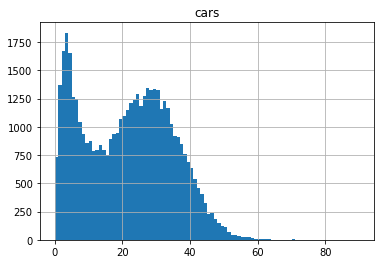

In [14]:
df_cars.hist(bins=90)
pd.value_counts(df_cars.cars).head(n=10)

Showing the values over time:

(_Not really very useful, mostly to give a sense of how the data varies_)

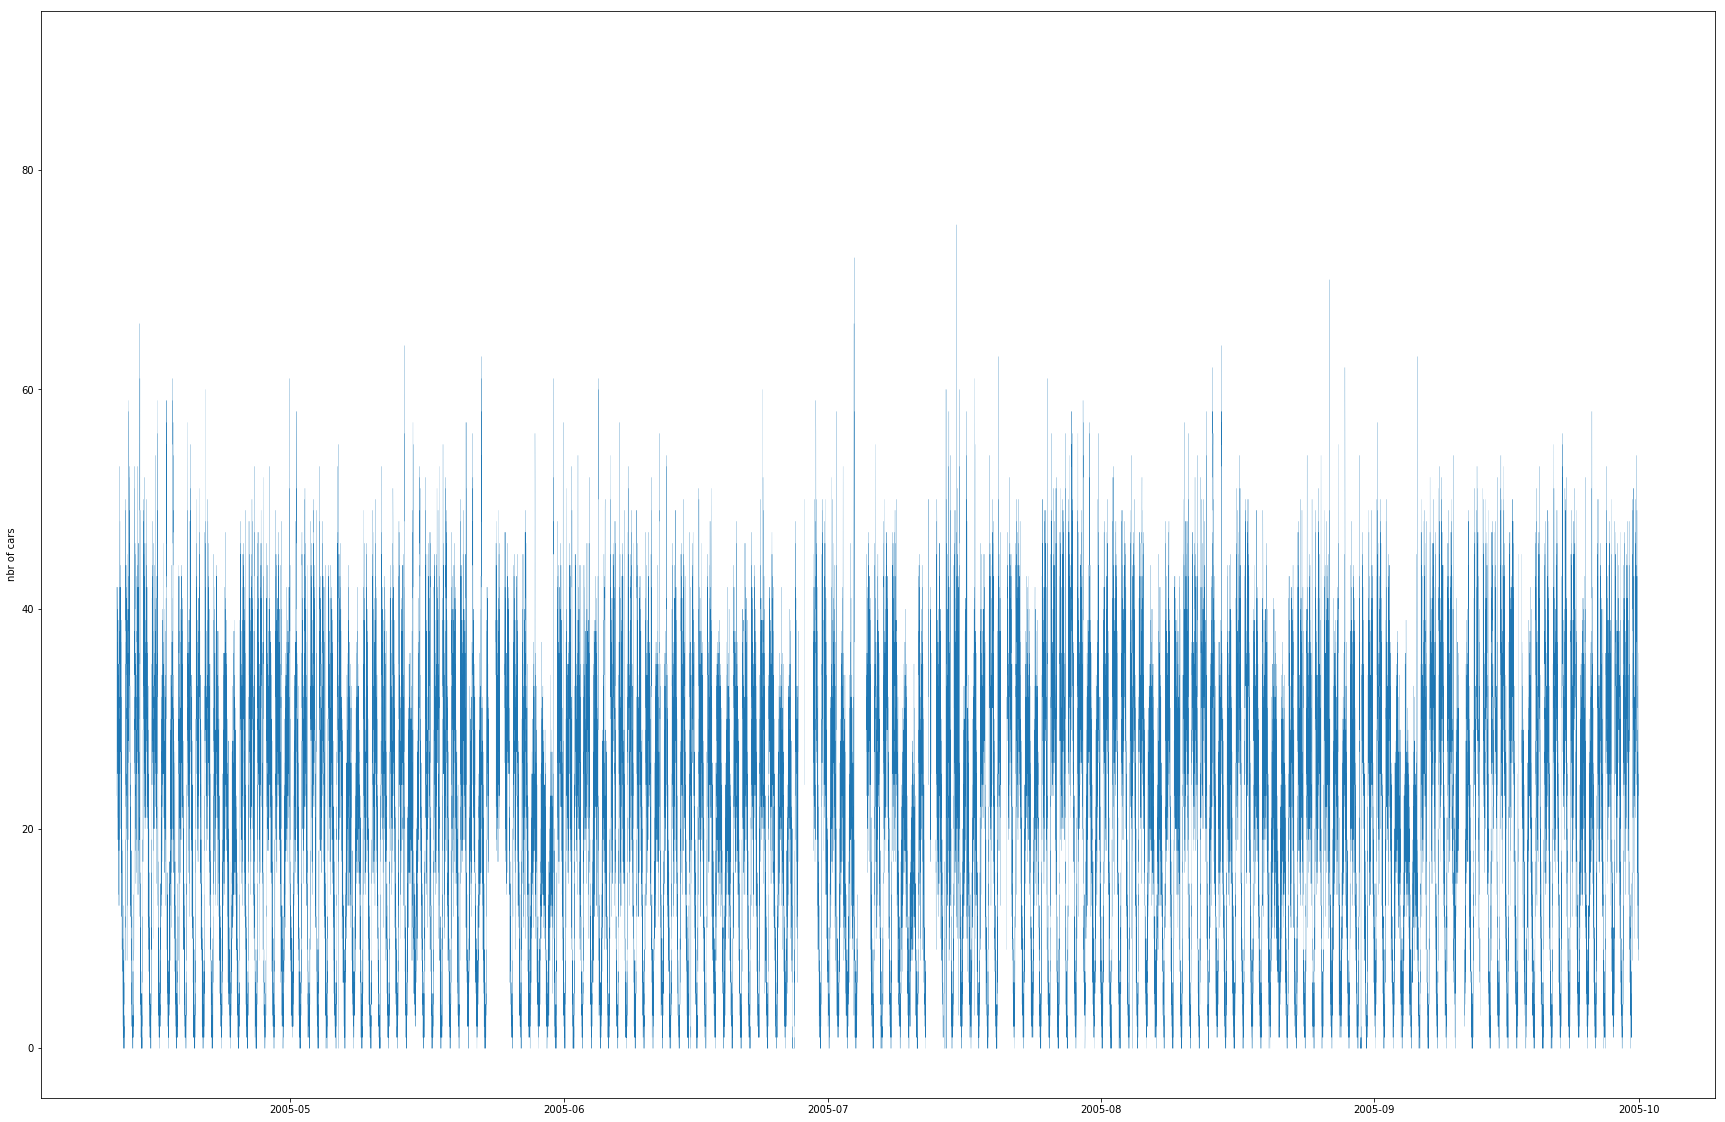

In [15]:
plt.figure(figsize=(30,20))
plt.plot(df_cars.cars, linewidth=0.15)
plt.ylabel("nbr of cars")
plt.show()

Visualise the missing data:

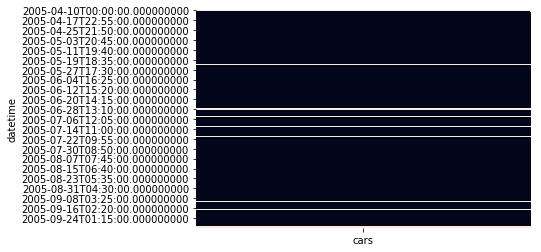

In [16]:
# ratio = 3
ax = sns.heatmap(df_cars.isnull(), cbar=False)
# ax.set_aspect(1.0/ax.get_data_ratio()*ratio)

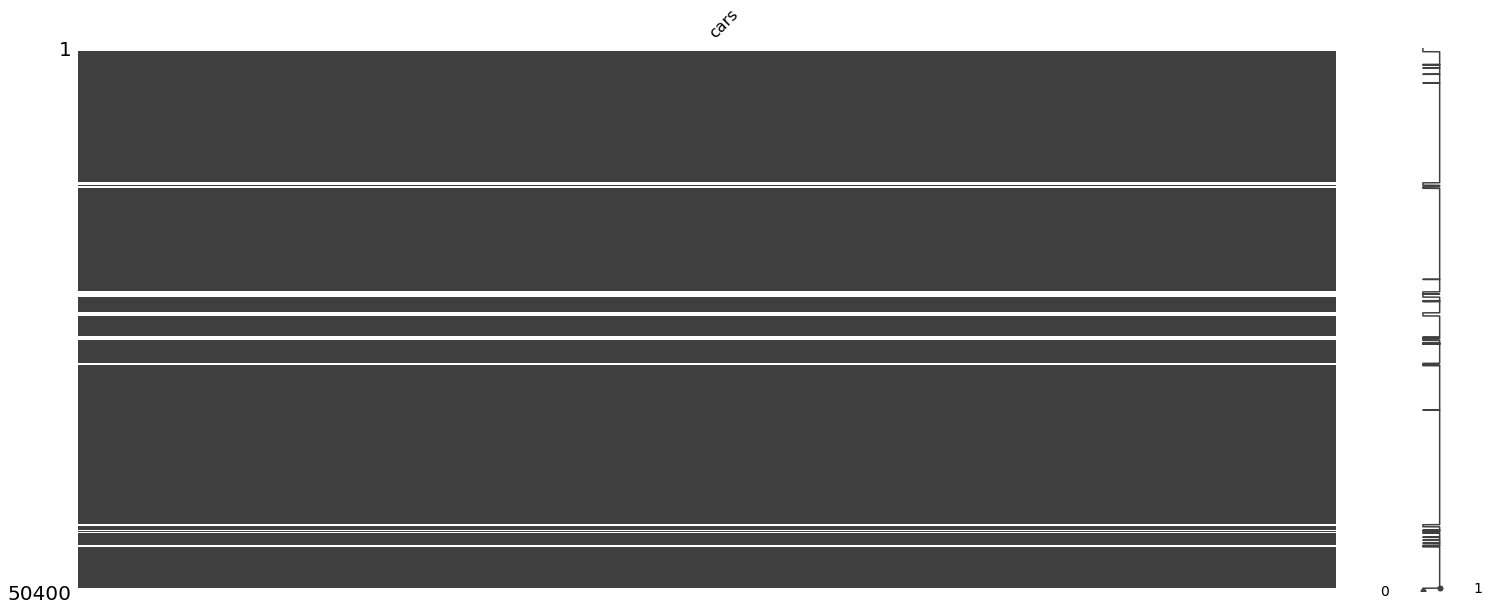

In [17]:
msno.matrix(df_cars)

Some interpolation of the missing data:

In [18]:
# help(pd.DataFrame.interpolate)

In [19]:
df_cars.count()

cars    47497
dtype: int64

First try simple linear interpolation:

In [20]:
df_cars.interpolate().count()

cars    50021
dtype: int64

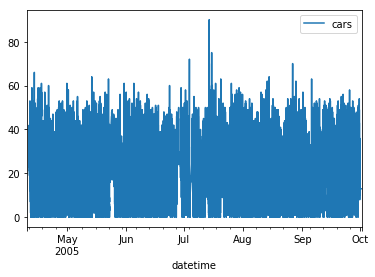

In [21]:
# https://pandas.pyorg/pandas-docs/stable/user_guide/missing_html#interpolation
df_cars.interpolate().plot()

#### Prepare to visually check the interpolated data

The plan was to find the gaps in the data, visualise how the data looked around those gaps and so try to visually verify if a simple kind of interpolation (like the linear interpolation above) would work well.

The first step: Which dates contain missing data?

In [22]:
missing_data_dates = pd.to_datetime(np.unique(df_cars[df_cars.cars.isnull()].index.date))
missing_data_dates

DatetimeIndex(['2005-04-10', '2005-04-11', '2005-04-15', '2005-04-16',
               '2005-04-18', '2005-04-21', '2005-05-23', '2005-05-24',
               '2005-05-25', '2005-06-23', '2005-06-27', '2005-06-28',
               '2005-06-29', '2005-06-30', '2005-07-04', '2005-07-05',
               '2005-07-12', '2005-07-13', '2005-07-14', '2005-07-20',
               '2005-07-21', '2005-08-04', '2005-09-10', '2005-09-11',
               '2005-09-12', '2005-09-13', '2005-09-14', '2005-09-15',
               '2005-09-16', '2005-09-17', '2005-10-01'],
              dtype='datetime64[ns]', freq=None)

Construct a new dataframe with the missing data dates from above, and the number of missing values on those dates:

In [23]:
na_counts = {}

for i in range(len(missing_data_dates)):
    mask = (df_cars.index > missing_data_dates[i]) & (df_cars.index < missing_data_dates[i]+timedelta(days=1))
    na_counts[missing_data_dates[i]] = df_cars.loc[mask].cars.isna().sum()
 
na_values_per_date = pd.DataFrame.from_dict(
    data=na_counts, 
    orient='index', 
    columns=['na_count'])

na_values_per_date.head()

,na_count
2005-04-10,287
2005-04-11,90
2005-04-15,13
2005-04-16,2
2005-04-18,1


This graph shows all days in the period given that contains missing values, and for each such day the number of missing values are shown. The horizontal black line shows the total number of samples taken by the sensor in a day. In this graph it helps give a sense of the proportion of missing samples during a day (e. g. if a bar touches the black line, all samples from that day are missing).

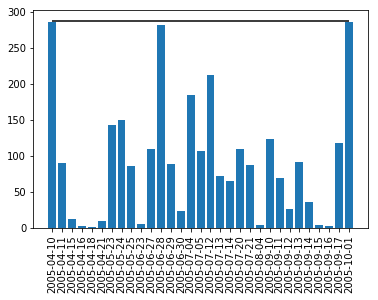

In [24]:
plt.xticks(rotation=90)
plt.bar(na_values_per_date.index.astype('str'), height=na_values_per_date['na_count'])
plt.hlines(288, '2005-04-10', '2005-10-01')

One reason for showing the graph above is to aid the process of missing data interpolation, or more generally, handling. If all days with missing data only had a small number of missing values, probably a simple interpolation would be okay (then my plan from above about visually checking the gaps' surroundings could be used, and could still be used for the days with a lower proportion of missing data). As it is now, there are at least a couple of days that could probably benefit from another approach. One such approach could be to check which day of the week a day with much missing data is, and construct data from the mean of all corresponding (normal) weekdays in the data set, for each 5-minute period (or n-minute period, this might also have to be validated in some way (e. g. visually again, see if the descriptive statistics (e. g. mean, std etc) changes a lot) and the results of such a validation would steer how to construct the data).

Another thing that would steer how to construct or otherwise deal with the data would be depending on what is intended with it. For time series modelling it might be more preferable to construct the missing data, e. g. so that there always are inputs for algorithms that use past samples (if the algorithm doesn't have any way to deal with that). If the goal is to analyse gathered data to see what happened in retrospect it might be inappropriate to construct data in any way, to 'rewrite history' so to speak. In that case it might be more appropriate to just mark where there is missing data, and report/analyse the reasons for the data being missing. Basically, the goal of the project will dictate how to handle missing data.

**Why**: I will not continue with the missing data exploration/construction now, instead I provide possible next steps to take and some discussion about it above. This because I want to focus on other things in this challenge as well, the possible next steps would take some time to do but is perhaps not so interesting to show. I hope I have demonstrated some awareness about missing data problems and techniques to deal with them nevertheless.

---

# Loading the events data

In [25]:
df_events = pd.read_csv('data/Dodgers.events_transformed',
                        # na_values=[-1], 
                        parse_dates=[0],
                        # parse_dates=[1],
                        # infer_datetime_format=True,
                        names = ['date', 'start_time', 'end_time', 'attended', 'away_team', 'score']
                       )

Transformed these dates as well, with:

```
% s/\(\d*\)\/\(\d*\)\/\(\d*\),\(.*\)/20\3-\1-\2,\4/
```

A quick peek at the data:

In [26]:
df_events.head()

,date,start_time,end_time,attended,away_team,score
0,2005-04-12,13:10:00,16:23:00,55892,San Francisco,W 9-8
1,2005-04-13,19:10:00,21:48:00,46514,San Francisco,W 4-1
2,2005-04-15,19:40:00,21:48:00,51816,San Diego,W 4-0
3,2005-04-16,19:10:00,21:52:00,54704,San Diego,W 8-3
4,2005-04-17,13:10:00,15:31:00,53402,San Diego,W 6-0


In [27]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
date          81 non-null datetime64[ns]
start_time    81 non-null object
end_time      81 non-null object
attended      81 non-null int64
away_team     81 non-null object
score         81 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.9+ KB


In [28]:
df_events.describe()

,attended
count,81.000000
mean,44489.876543
std,7058.581577
min,30329.000000
25%,40019.000000
50%,44963.000000
75%,48490.000000
max,55892.000000


### Creating a dataframe with what days are gamedays respectively not:

To get a sense of how many days contains 'shocks'.

In [29]:
df_gamedates = pd.DataFrame(
    pd.to_datetime(np.unique(df_cars.cars.index.date)), 
    columns=['date']
)

tmp = pd.DataFrame(
    pd.to_datetime(df_events.date), 
    columns=['date']
)

df_gamedates['gameday'] = df_gamedates['date'].isin(tmp['date'])

df_gamedates.head()

,date,gameday
0,2005-04-10,False
1,2005-04-11,False
2,2005-04-12,True
3,2005-04-13,True
4,2005-04-14,False


The number of days in the dataset that are not gamedays and that are gamedays, respectively:

_(`True` are gamedays)_

False    94
True     81
Name: gameday, dtype: int64


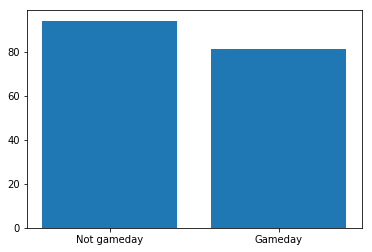

In [30]:
plt.bar(['Not gameday', 'Gameday'], df_gamedates.gameday.value_counts())
print(df_gamedates.gameday.value_counts())

So there are more 'normal' days than 'shock' days (i. e. days with a game event, that makes the ramp traffic deviate from the 'normal' flow).

What does the distribution of gamedays during the period look like?

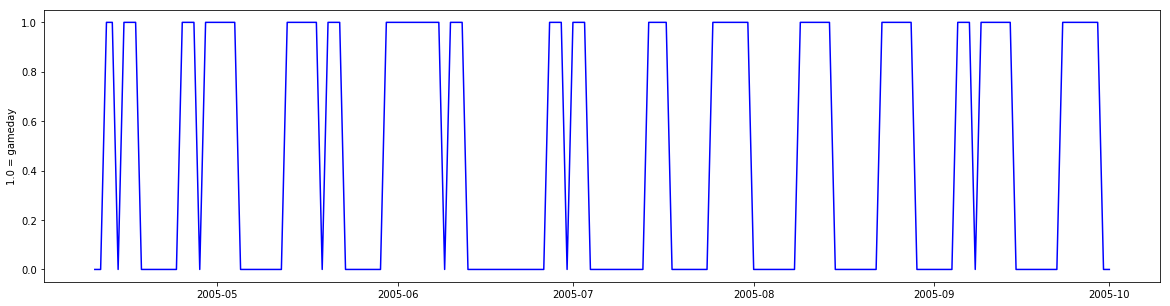

In [31]:
plt.figure(figsize=(20,5))
plt.plot(df_gamedates['date'], df_gamedates['gameday'], 'b-')
plt.ylabel("1.0 = gameday")
plt.show()

---

---

# _Tentative modelling (very much WiP)_

In [32]:
df_cars[513:514]

,cars
datetime,
2005-04-11 18:45:00,28.0


In [38]:
df_cars['2005-05-10'].count()

cars    288
dtype: int64

In [39]:
df_cars_model = df_cars.copy(deep=True)
df_cars_model.head()

,cars
datetime,
2005-04-10 00:00:00,NaN
2005-04-10 00:05:00,NaN
2005-04-10 00:10:00,NaN
2005-04-10 00:15:00,NaN
2005-04-10 00:20:00,NaN


In [40]:
df_cars_model['dayofweek'] = df_cars_model.index.dayofweek
df_cars_model.head()

,cars,dayofweek
datetime,,
2005-04-10 00:00:00,NaN,6
2005-04-10 00:05:00,NaN,6
2005-04-10 00:10:00,NaN,6
2005-04-10 00:15:00,NaN,6
2005-04-10 00:20:00,NaN,6


In [41]:
time_of_day_index = [x for x in range(288)]

In [44]:
len(df_cars_model) / 288

175.0

In [45]:
# df_cars_model['timeofday'] = # fill with time_of_day_index until done (175 times)
df_cars_model.head()

,cars,dayofweek
datetime,,
2005-04-10 00:00:00,NaN,6
2005-04-10 00:05:00,NaN,6
2005-04-10 00:10:00,NaN,6
2005-04-10 00:15:00,NaN,6
2005-04-10 00:20:00,NaN,6


In [43]:
df_cars_model.tail()

,cars,dayofweek
datetime,,
2005-10-01 23:35:00,NaN,5
2005-10-01 23:40:00,NaN,5
2005-10-01 23:45:00,NaN,5
2005-10-01 23:50:00,NaN,5
2005-10-01 23:55:00,NaN,5


---